<img src="https://raw.githubusercontent.com/FUlyankin/r_probability/master/end_seminars/sem_2/yYGiBqtirSM.jpg" height="300" width="300"> 

# <center> R для тервера и матстата <br>  <br> Варка распределений </center>

---------------

Данный ноутбук является конспектом по курсу «R для теории вероятностей и математической статистики» (РАНХиГС, 2020). Автор ноутбука - [вот этот парень по имени Филипп.](https://vk.com/ppilif) Если у вас для него есть деньги, слава или женщины, он от этого всего не откажется. Ноутбук распространяется на условиях лицензии [Creative Commons Attribution-Share Alike 4.0.](https://creativecommons.org/licenses/by-sa/4.0/) При использовании обязательно упоминание автора курса и аффилиации. При наличии технической возможности необходимо также указать активную гиперссылку на [страницу курса.](https://github.com/FUlyankin/r_probability) На ней можно найти другие материалы. Фрагменты кода, включенные в этот notebook, публикуются как [общественное достояние.](https://creativecommons.org/publicdomain/zero/1.0/)


In [1]:
library("ggplot2")  # Пакет для красивых графиков 
library("reshape2")
library("grid")     # Пакет для субплотов

# Эти пакеты для Rstudio не очень то и нужны 
# Отрегулируем размер картинок, которые будут выдаваться в нашей тетрадке
library('repr')
options(repr.plot.width=6, repr.plot.height=3)

# Важное правило 

- Сейчас мы будем варить распределения. В связи с этим я хочу, чтобы вы называли меня мистер Хайзенберг, а я вас буду называть Джесси. 

- Если кто-то будет обращаться ко мне иначе, я буду его игнорировать 

<center>
<img src="pictures/breakingbad.jpeg" width="800"> 
</center>

# 1. Как компьютер генерирует случайности?


- __Идея!__ Согласно квантовой теории, невозможно узнать наверняка когда произойдёт радиоактивный распад. Давайте положим в компьютер немножечко урана.

<center>
<img src="pictures/homer.jpg" width="500"> 
</center>

- __Идея!__ Действия человека непредсказуемы. Будем собирать те промежутки времени, которые проходят между нажатиями кнопок на клавиатуре. Это поможет генерировать случайные числа.

- __Идея!__ Давайте использовать непредсказуемые шумы в атмосфере. [Пример такого генератора.](https://www.random.org/)


- __Идея!__ Давайте не будем опираться на природу. Это дорого и медленно. Лучше придумаем псевдослучайный алгоритм. 


## Псевдослучайные алгоритмы:


- Последовательность цифр в числе $\pi$ довольно непредсказуема. Давайте окажемся в каком-то месте числа $\pi$ и с него начнём генерацию.

- Вся псевдослучайность зависит только от начального значения. Это ненадёжный алгоритм. 


- Другой пример [Вихрь Мерсена,](https://ru.wikipedia.org/wiki/Вихрь_Мерсенна) основанный на простых числах Мерсена. 

- Можно придумать более надёжные алгоритмы, некоторые держатся под секретом. 

- Легче всего научиться генерировать равномерное распределение. А как получить из него любое другое? 


# 2. Упражнение - подводочка 

Пусть случайная величина $X$ имеет экспоненциальное распредеелиние $Exp(1)$. То есть её функция распределения: 

$$
F_X(x) = \begin{cases} 1 - e^{-\lambda x} \text{, если } x \ge 0 \\ 0 \text{, если } x < 0  \end{cases}
$$

А плотность:

$$
f_X(x) = \begin{cases} \lambda e^{- \lambda x} \text{, если } x \ge 0 \\ 0 \text{, если } x < 0  \end{cases}
$$


__а)__ Случайная величина $Y = \sqrt{X}$. Нужно найти её плотность распределения.

__Решение:__

__б)__ Случайная величина $Y = 1 - e^{-X}$ Нужно найти её плотность распределения. 

__Решение:__ 

__в)__ У случайной величины $X$ распределение с функцией $F_X(x)$. Надо найти распределение случайной величины $Y = F_X(X)$

__Решение:__

# 3. Квантильное преобразование 


#### Теорема:

Пусть функция распределения $F_X(x)$ непрерывна. Тогда случайная величина $Y = F(X)$ имеет равномерное распределение на отрезке $[0; 1]$.


#### Следствие:

Пусть $Y \sim U[0;1]$, а $F(x)$ произвольная функция распределения. Тогда случайная величина $X = F^{-1}(Y)$ будет иметь функцию распределения $F(x)$.


#### Что это нам даёт:


- Позволяет варить из равномерного распределения другие 

- Применимо невсегда, напрмер для нормального распределения используют другие алгоритмы __(Почему?)__

<center>
<img src="pictures/quant.png" height="200"> 
</center>

Генерация случайностей это довольно сложное занятие. Равномерная случайная величина одна из самых приятных в плане генерации. Обычно алгоритмы генерации создают именно для неё, так как с более сложными распределениями возникают проблемы.  Квантильное преобразование позволяет нам расширить навыки компьютера и переработать равномерную случайную величину в необходимое нам распределение. Снова математика позволила нам быть клёвыми. Приятно. 

# 4. Пробуем на практике

Как же мы можем сварить из равномерной случайной величины, $U[0; 1]$  экспоненциальную величину, $Exp(\alpha)$?

На самом деле легко! Из теории вероятностей мы знаем, что у экспоненциальной случайной величины функция распределения выглядит так: 

$$
F_X(x) = 1 - e^{-\alpha x}.
$$

Найдём обратную функцию:

$$
F_X^{-1}(y) = -\frac{1}{\alpha} \ln(1-y). 
$$


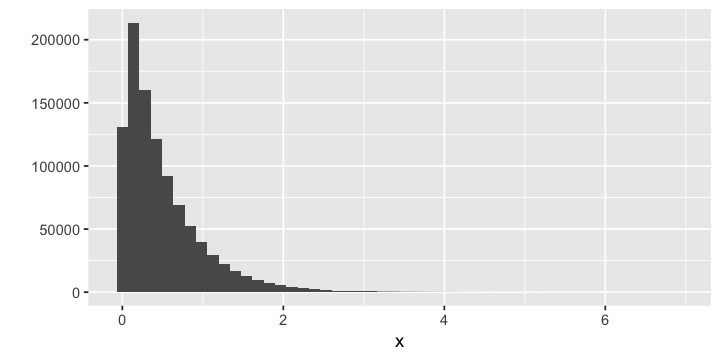

In [2]:
y <- runif(10^6)
x <- -0.5*log(1 - y)
qplot(x, bins=50)

In [3]:
mean(x)

[1] 0.5004034

Теперь попробуем в обратную сторону. 

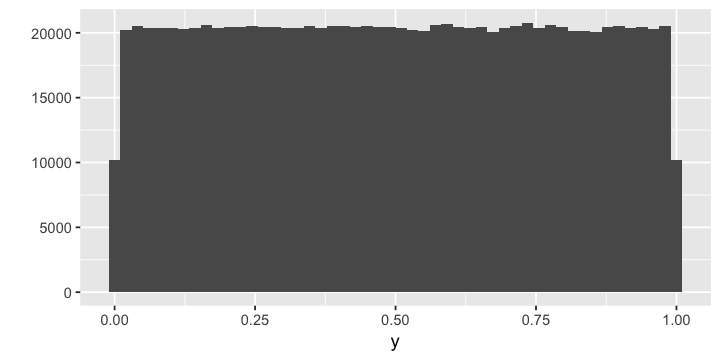

In [4]:
x <- rexp(10^6, rate = 2)
y <- 1 - exp(-2*x)
qplot(y, bins=50)

Вот и все дела. Аналогично можно попробовать получить какую-нибудь нестандартную случайно величину с заранее известной функцией распределения. Давайте попробуем получить случайную величину со следующей функцией распределения: 

$$
F(x) = \begin{cases} 0, x < 0 \\ x^7, x \in [0,1] \\ 1, x > 1 \end{cases}
$$

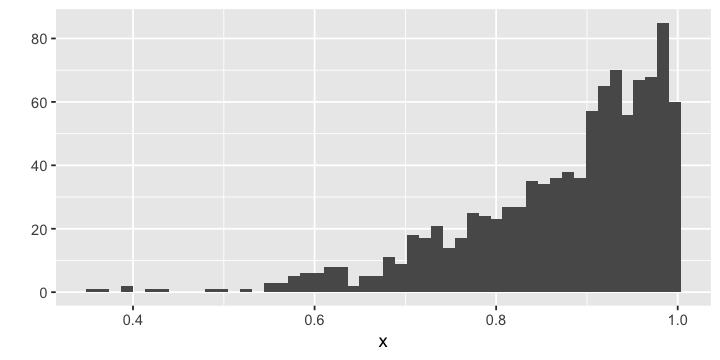

In [5]:
y = runif(1000, min = 0, max = 1)
x = y**(1/7)
qplot(x, bins=50)

Ясное дело, что работать такая схема будет не всегда. Например, её никогда не используют для нормального распределения. Проблема в том, что подсчет обратной функции распределения для него аналитически невозможен, так как интеграл 


$$ 
F(x) = \int_{-\infty}^{x} \frac{1}{\sigma \sqrt{2 \pi}} \cdot e^{-\frac{(t-\mu)^2}{2 \sigma^2}} dt
$$

не берётся. Немного подробнее про разные генераторы случайных чисел можно [почитать на хабре.](https://habrahabr.ru/post/263993/)

# 5. Распределения из матстата

В теории вероятностей [огромное количесвто распределений!](http://www.math.wm.edu/~leemis/2008amstat.pdf) В презентации, на одном из слайдов, мы видели как они все взаимосвязаны между собой в огромный клубок. 

Мы довольно часто будем иметь дело с несколькими распределениями, которые на первый взгляд могут показаться довольно экстраординарными. Давайте познакомимся с ними и поймём зачем люди придумали их. 

## 5.1 Нормальное распределение 

Уже знакомы. Часто встречается на практике из-за ЦПТ. Давайте просто нарисуем плотности нормального распределения при разных $\mu$ и $\sigma$ и на этом успокоимся. 

In [6]:
x = seq(-8, 8, 0.1)

df = data.frame(x)

mu = c(0,0,0,2,2)
sigma = c(1,2,3,3,1)

for(i in 1: length(mu)){
    col = paste0("m= ", mu[i], ", s= ", sigma[i])
    df[col] = dnorm(x, mean=mu[i], sd=sigma[i])
}

head(df)

x,"m= 0, s= 1","m= 0, s= 2","m= 0, s= 3","m= 2, s= 3","m= 2, s= 1"
-8.0,5.052271e-15,6.691511e-05,0.003798662,0.0005140930,7.694599e-23
-7.9,1.118796e-14,8.162820e-05,0.004149477,0.0005741896,2.081177e-22
-7.8,2.452855e-14,9.932774e-05,0.004527656,0.0006405993,5.573000e-22
-7.7,5.324148e-14,1.205633e-04,0.004934817,0.0007138962,1.477495e-21
-7.6,1.144156e-13,1.459735e-04,0.005372619,0.0007946961,3.878112e-21
-7.5,2.434321e-13,1.762978e-04,0.005842767,0.0008836587,1.007794e-20


In [7]:
data_long <- melt(df, id = "x")  # convert to long format
head(data_long)

x,variable,value
-8.0,"m= 0, s= 1",5.052271e-15
-7.9,"m= 0, s= 1",1.118796e-14
-7.8,"m= 0, s= 1",2.452855e-14
-7.7,"m= 0, s= 1",5.324148e-14
-7.6,"m= 0, s= 1",1.144156e-13
-7.5,"m= 0, s= 1",2.434321e-13


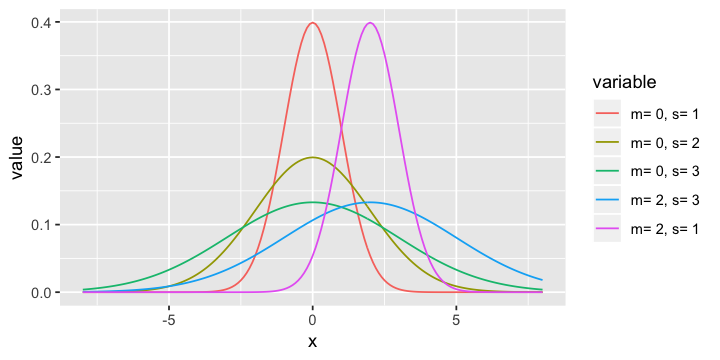

In [8]:
ggplot(data=data_long,
       aes(x=x, y=value, colour=variable)) +
       geom_line()

__Когда такая штука встречается на практике?__   

Мы постоянно будем считать средние. Любое среднее благодаря ЦПТ имеет асимптотически нормальное распределение. Позже мы даже найдём его математическое ожидание и дисперсию и даже обобщим ЦПТ на более сложные случаи. 

## 5.2 Распределение Хи-квадрат

Пусть случайные величины $X_1, \ldots, X_k$ независимы и одинаково распределены. Причём нормально с параметрами $0$ и $1$. Обычно такой факт записывают следующим образом: 

$$
X_1, \ldots, X_k \sim iid \hspace{2mm} N(0,1).
$$ 

Буквы $iid$ расшифровываются как identically independently distributed (независимы и одинаково распределены).

__Определение:__  случайная величина $Y = X_1^2 + \ldots X_k^2$ имеет распределение хи-квадрат с $k$ степенями свободы. Кратко это записывают как $Y \sim \chi^2_k.$

Степень свободы это просто название для параметра распределения. Почему оно именно такое, мы обсудим позже. Сейчас давайте попробуем получить хи-квадрат из нормальной выборки. 

In [24]:
# Одна такая случайная величина (5 степеней свободы)
x = rnorm(5, mean=0, sd=1)
sum(x**2)

[1] 0.6552271

In [25]:
n_obs = 1000
m = 5

x = rnorm(n_obs * m, mean=0, sd=1)
length(x)

[1] 5000

In [26]:
x = matrix(x, n_obs, m)
dim(x)

[1] 1000    5

In [27]:
x = rowSums(x**2)
length(x)

[1] 1000

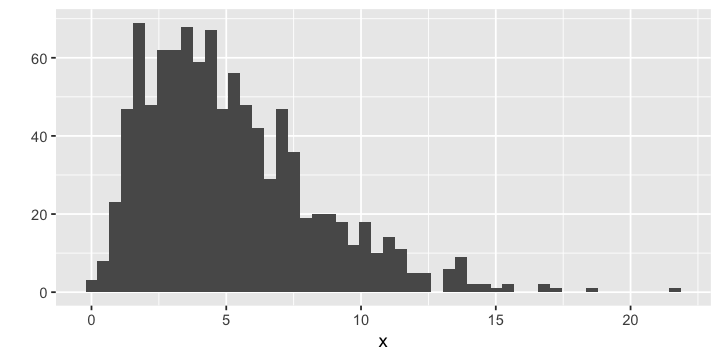

In [13]:
qplot(x, bins=50)

Внутри `R` уже есть готовая реализация $\chi^2_k$.

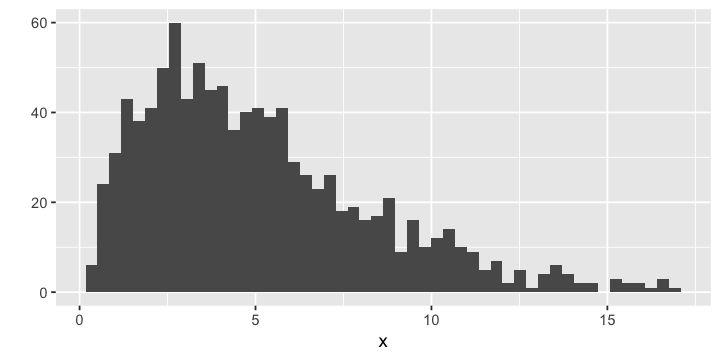

In [14]:
x = rchisq(1000, df=5)
qplot(x, bins=50)

Давайте посмотрим как плотность распределения будет выглядеть на картинке в зависимости от разных $k$. Понятное дело, что из-за квадрата, случайная величина принимает только положительные значения. 

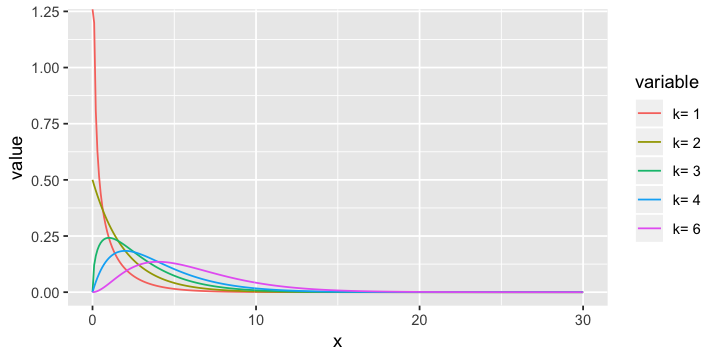

In [15]:
x = seq(0, 30, 0.1)

df = data.frame(x)

k = c(1, 2, 3, 4, 6, 9)

for(i in 1: length(mu)){
    col = paste0("k= ", k[i])
    df[col] = dchisq(x, df=k[i])
}

data_long <- melt(df, id = "x")

ggplot(data=data_long,
       aes(x=x, y=value, colour=variable)) +
       geom_line()

__Когда такая штука встречается на практике?__ Когда мы на первой неделе говорили про описательные статистики, мы упоминали, что выборочную дисперсию можно считать по формуле 

$$
\hat \sigma^2 = \overline{x^2} - \overline x^2.
$$

Ели выборка пришла к нам из нормального распределения, тогда $\overline{x^2}$ будет иметь $\chi^2_n$. Если чуток поколдовать, можно убедиться, что для дисперсии тоже всплывает хи-квадрат распределение. В будущем мы это проделаем. 

## 5.3 Распределение Стьюдента

__Определение:__ Заведём ещё одну случайную величину $X_0$ со стандартным нормальным распределением. Пусть она низависима от $X_1, \ldots, X_k$. Тогда говорят, что случайная величина 

$$ Y = \frac{X_0}{\sqrt{^{\chi^2_k}/_k}} $$

имеет $t$-распределение стьюдента c $k-1$ степенью свободы, $Y \sim t (k-1)$. Снова попробуем получить это распределение из нормальной выборки. 

In [16]:
x0 = rnorm(1)

x = rnorm(5, mean=0, sd=1)
x = sum(x**2)

y = x0/sqrt(x/5)
y  # Одна такая случайная величина (4 степени свободы)

[1] 0.5416423

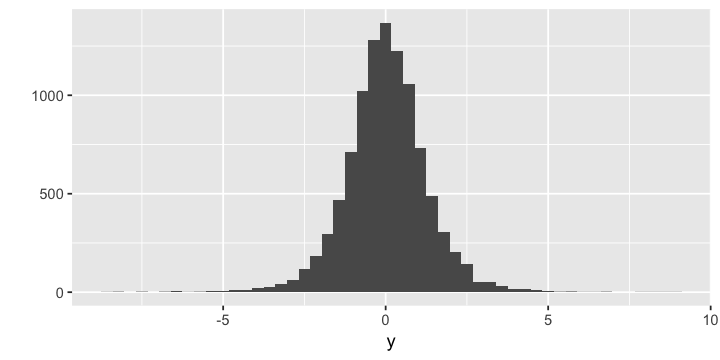

In [17]:
# хотим выборку из 10 000 штук
n_obs = 10000
m = 5

x0 = rnorm(n_obs)

x = rnorm(n_obs * m, mean=0, sd=1)
x = matrix(x, n_obs, m)
x = rowSums(x**2)

y = x0/sqrt(x/5)
qplot(y, bins=50)

Снова внутри `R` уже есть готовая реализация $t(k)$.

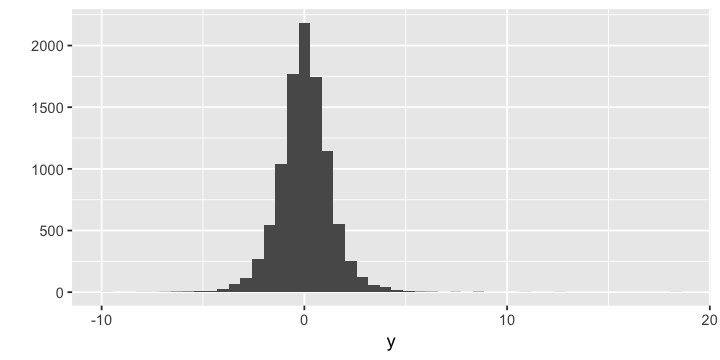

In [18]:
y = rt(10000, df=5)
qplot(y, bins=50)

Давайте посмотрим как плотность распределения будет выглядеть на картинке в зависимости от разных $k$. 

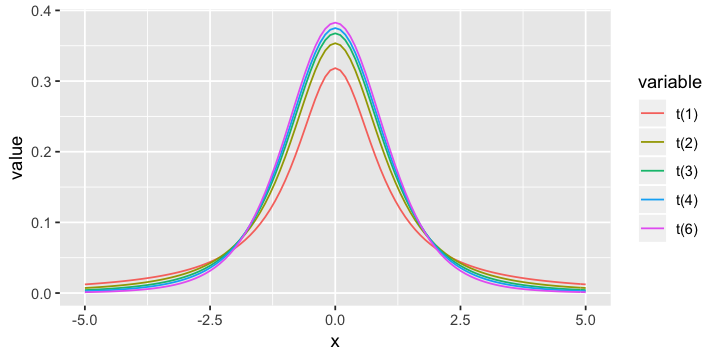

In [19]:
x = seq(-5, 5, 0.1)

df = data.frame(x)

k = c(1, 2, 3, 4, 6, 9)

for(i in 1: length(mu)){
    col = paste0("t(", k[i],")")
    df[col] = dt(x, df=k[i])
}

data_long <- melt(df, id = "x")

ggplot(data=data_long,
       aes(x=x, y=value, colour=variable)) +
       geom_line()

Важно заметить, что при росте $k$ распределение Стьюдента становится всё больше и больше похоже на нормальное. В будущем этот факт нам пригодится. 


__Когда такая штука встречается на практике?__  Довольно часто на практике будет всплывать выражение

$$
\frac{\bar x}{\sqrt{ \frac{\hat \sigma^2}{n}}}.
$$

Мы знаем, что по ЦПТ у числителя нормальное распределение, а в знаменателе как раз стоит  $\sqrt{^{\chi^2_n}/_n}$. Значит в целом выражение будет иметь распределение Стьюдента с $n-1$ степенью свободы.

## 5.4 Распределение Фишера

__Определение:__ случайная величина 

$$ Y = \frac{^{\chi^2_k}/_k}{^{\chi^2_m}/_m}$$

имеет распределение Фишера с $k$ и $m$ степенями свободы, $Y \sim F(k,m)$. Сгенерируем её! 

In [20]:
k = 5
m = 15

x1 = rnorm(k, mean=0, sd=1)
x1 = sum(x1**2)

x2 = rnorm(m, mean=0, sd=1)
x2 = sum(x2**2)

y = (x1/k)/(x2/m)
y  # Одна такая случайная величина (5 и 15 степеней свободы)

[1] 1.273751

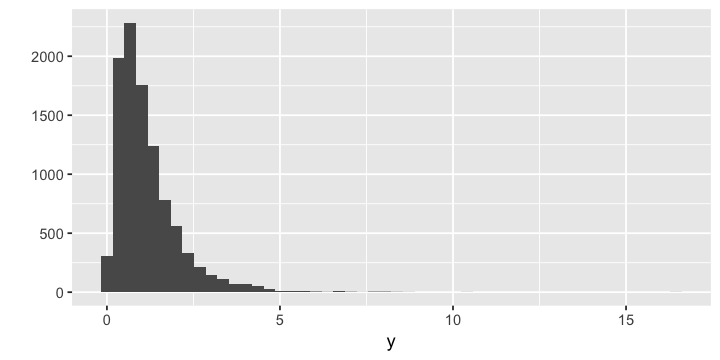

In [21]:
# хотим выборку из 10000 штук
n_obs = 10000
k = 5
m = 15

x1 = rnorm(n_obs * k, mean=0, sd=1)
x1 = matrix(x1, n_obs, k)
x1 = rowSums(x1**2)

x2 = rnorm(n_obs * m, mean=0, sd=1)
x2 = matrix(x2, n_obs, m)
x2 = rowSums(x2**2)

y = (x1/k)/(x2/m)
qplot(y, bins=50)

Снова внутри `R` уже есть готовая реализация $F(k,m)$.

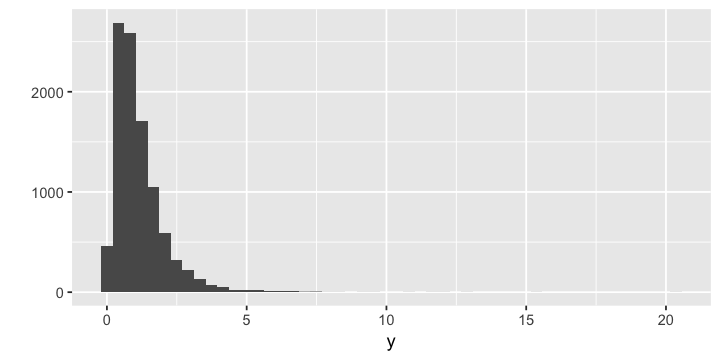

In [22]:
y = rf(10000, df1=5, df2=15)
qplot(y, bins=50)

Снова посмотрим как меняется плотность при изменении степеней свободы. 

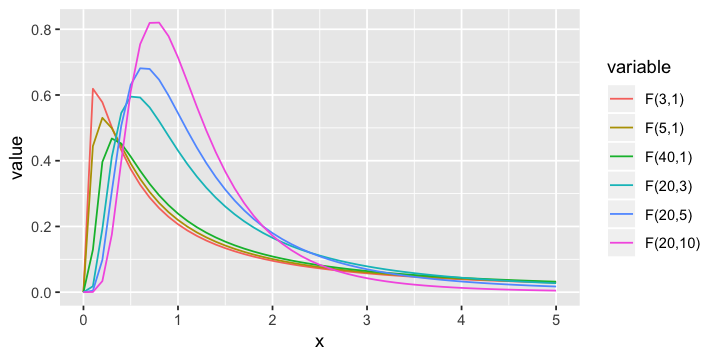

In [23]:
x = seq(0, 5, 0.1)

df = data.frame(x)

k = c(3,5,40,20,20,20)
m = c(1,1,1,3,5,10)

for(i in 1: length(k)){
    col = paste0("F(", k[i], ",", m[i], ")")
    df[col] = df(x, df1=k[i], df2=m[i])
}

data_long <- melt(df, id = "x")

ggplot(data=data_long,
       aes(x=x, y=value, colour=variable)) +
       geom_line()

__Когда такая штука встречается на практике?__  Рано или поздно мы захотим сравнивать дисперсии. Там-то и вылезет распределение Фишера. 

# 6. Тяжёлые хвосты 

Давайте нарисуем на одной картинке $N(0,1)$ и $t(1)$ распределения. 

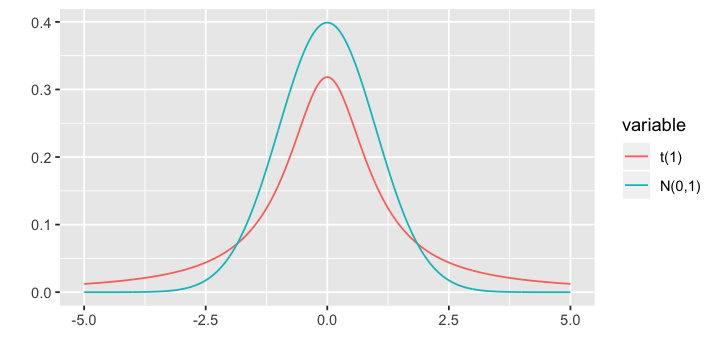

In [28]:
x = seq(-5, 5, 0.01)

df = data.frame(x)

df["t(1)"] = dt(x, df=1)
df["N(0,1)"] = dnorm(x)

data_long <- melt(df, id = "x")

ggplot(data=data_long,
       aes(x=x, y=value, colour=variable)) +
       geom_line() + xlab(' ') + ylab(' ')

Посмотрите на эти две плотности. У красной хвосты лежат выше, чем у синей. Хвосты $t(1)$ тяжелее $N(0,1)$. Под ними находится большая вероятностная масса. Такие хвосты называются толстыми. Вероятность того, что очень большое, аномальное значение случайной величины, вывалится из распределения с толстым хвостом, выше. 

In [29]:
# P(t(1) > 10)
x = rt(1000, df=1)
mean(x > 3)

[1] 0.092

In [30]:
# P(N(0,1) > 10)
x = rnorm(1000)
mean(x > 3)

[1] 0.004

Главная проблема заключается в том, что по сравнению с количеством наблюдений из серцевины распределения, число наблюдений из хвостов, ничтожно мало. Из-за этого их постоянно недооценивают. __В статистике есть даже отдельные методы по работе с хвостами.__ 

Обычно проблема тяжёлых хвостов выскакивает в финансах. У нас в выборке оказывается довольно мало примеров из области хвостов, потому что они редко порождаются данными. Из-за маленького числа наблюдений из хвостов, мы не можем адекватно оценить что в них происходит и занижаем вероятности оказаться в них. Представим себе следующий сценарий развития событий: 

Мы собрали данные по акции 

@@@@@@@@@@@@@

Мы построили распределение её доходностей как нормальное

@@@@@@@@@@@@@

В выборке оказалось мало примеров с очень мальнькой доходностью, поэтому мы случайно занизили вероятность маленьких доходностей. 

@@@@@@@@@@@@@

Мы ожидаем на основе моделей, что маленькие доходности будут в $5\%$ случаев. 

@@@@@@@@@@@@@

Они возникают чаше, потому что хвосты на самом деле толще. Насколько они толще мы не знаем. Мало данных. 

@@@@@@@@@@@@@

Мы терпим потери.

@@@@@@@@@@@@@

fuuuuuuuuuuuu

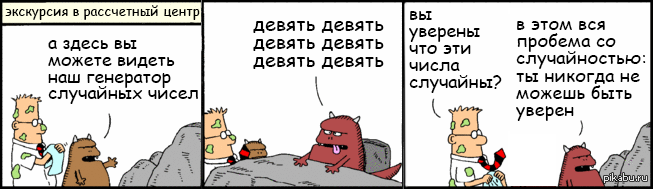

# 7. Пуассоновский процесс

Совсем немного подробнее [читай тут,](https://github.com/FUlyankin/book_about_bayes/blob/master/Review%20chapters/chapter_4.pdf) на странице 17-18.

Вероятность того, что за промежуток $t$ наступит $k$ событий будет считаться по формуле 

$$
P_t(k) = \frac{e^{-\lambda t} \cdot (\lambda t)^k}{k!}.
$$

Простейший поток событий обладает несколькими интересными свойствами: 

* __Стационарность.__ Появление $k$ событий на каком-то промежутке зависит только от числа $k$ и от длины этого промежутка. Точка начального отсчёта не имеет значения. 
* __Ординарность.__ Наступление более одного события этого потока за бесконечно малый промежуток времени является практически невозможным. 
* __Отсутствия после действия.__  Вероятность появления $k$ событий на любом промежутке времени не зависит от того сколько событий произошло до этого. 	

Все эти свойства можно довольно легко доказать. Невооруженным взглядом видно, что вероятность зависит только от $k$ и $t$, что характеризует стационарность потока, в формуле не используется никакой информации о том сколько событий наступило до этого, что характеризует свойство отсутствия после действия. Немного поколдовав можно убедиться в ординарности. Можно даже отталкиваясь от этих свойств получить формулу Пуассона. 

Мы не будем делать это. Можно посмотреть как это делается в книге [Б.В. Гнеденко <<Курс Теории вероятностей>> на страницах 294-300.](https://yadi.sk/i/O4hwgm4Xxz05yQ)

Перейдём к самому интересному. Пусть $T$ это промежуток времени между событиями. Давайте попробуем найти функцию распределения для этой случайной величины. 

Будем делать ровно также, как мы делали это на семинарах по теории вероятностей ... через вероятность. Нас интересует 

$$
F_T(t) = P(T \le t).
$$

Вероятность $P(T \le t)$ можно прочитать, как вероятность возникновения хотябы одного события в течение первых $t$ минут. Вероятность того, что за $t$ минут не возникнет ни одного события можно записать как 

$$
1 - F(t) = P(T > t).
$$

Это логично, если время ожидания $T$ перевалило за $t$, значит ни одного события ещё не наступило. На языке распределения пуассона 

$$
P(T > t) = P_0(t) = e^{-\lambda t}.
$$

Значит 

$$
F_T(t) = 1 - e^{-\lambda t}, \quad t \ge 0.
$$

Получилась функция распределения экспоненциальной случайной величины. Прочувствовали связь?  Давайте немного углубим её. Для Распределения Пуассона математическое ожидание составляет $\lambda$. Этот параметр интерпретируется как интенсивность потока событий. Чем он больше, тем больше событий за единицу времени может произойти. 

Для экспоненциального распределения математическое ожидание составляет $\frac{1}{\lambda}$. Чувствуете? Чем больше интенсивность потока событий, тем меньше в среднем времени проходит между ними.

__Упражнение:__ 

Надо сгенерировать выборку из распределения Пуассона, зная экспоненциальное.

In [ ]:
# код

# 8. Доказательство квантильного преобразования (дополнительный материал)

___Доказательство:___

Найдём функцию распределения случайной величины $Y$. Заметим, что всегда $0 \le Y \le 1$ в силу области определения функции распределения $F(x)$. Предположим сначала, что функция $F$ всюду возрастает, тогда она обратима и поэтому: 

$$
F_Y(y) = P(F(X) < y) = P(X < F^{-1}(y)) = F(F^{-1}(y)) = y, \text{ если } x \in (0,1).
$$

При этом мы знаем, что функция распределения $F(y) = y$ соответствует равномерному на отрезке $[0;1]$ распределению. 

Если функция $F$ не является всюду возрастающей, то у неё есть участки постоянства.В этом случае просто обозначим через $F^{-1}(y)$ самую левую точку из замкнутого множества $\{t \mid F(t) = x\}$. При таком понимании обратной функции все равенства, перичесленные выше, остаются справедливы. 